In [1]:
import sys
sys.path.append('../')

import numpy as np
import pygme

%load_ext autoreload
%autoreload 2

from pygme import GuidedModeExp, Circle, PhotCryst, Lattice
import matplotlib.pyplot as plt
from itertools import zip_longest

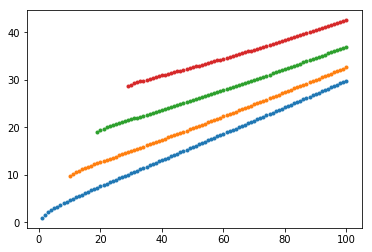

In [2]:
# Test guided mode solver
gs=np.linspace(1,100,100)
epses=np.array([1,12,1])
ds=np.array([0.1])
(omegas, coeffs) = pygme.guided_modes(gs, epses, ds, step=1e-1/np.sqrt(epses.max()), n_modes=4)
omegasT = [list(filter(None, i)) for i in zip_longest(*omegas)]

for w in omegasT:
    plt.plot(gs[-len(w):],w,'.')
plt.show()

## Square lattice 

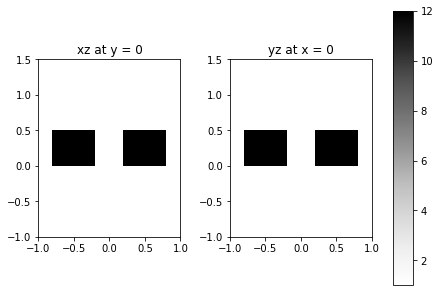

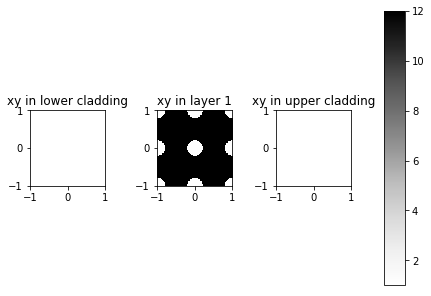

In [18]:
# Initialize a lattice
lattice = Lattice('square')
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=0.5, eps_b=12.)
# Add a shape to this layer 
phc.add_shape(Circle(r=0.2))
# phc.claddings[0].add_shape(Circle(r=0.1, eps=5))
# Plot an overview picture
phc.plot_overview(cladding='True')

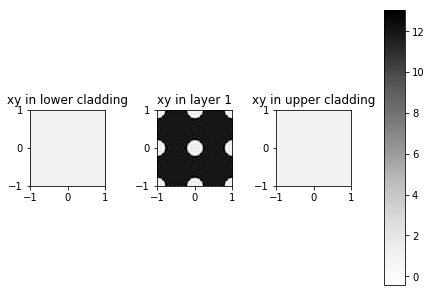

In [19]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft(cladding=True)

In [38]:
gme.run(N_g_array = 5)

[0.0001 0.0001 0.0001] [ 1.         10.61769923  1.        ]
1.0000237936130765 -52.76470238073185
[11.10728235 11.10728235 11.10728235] [ 1.         10.61769923  1.        ]
3.6428049731793974 1.9876722472524881
[22.21446469 22.21446469 22.21446469] [ 1.         10.61769923  1.        ]
6.285572003749813 2.1894952620397627
[33.32164704 33.32164704 33.32164704] [ 1.         10.61769923  1.        ]
8.928323092824964 1.7007630077814044
[44.42882938 44.42882938 44.42882938] [ 1.         10.61769923  1.        ]
11.571058240447993 0.7615666440689756
[[9.999999690056334e-05], [3.691998849905815], [7.008648515147992], [10.368769313671297], [13.74825880074724]] [[array([[[ 0.           +0.j        ],
        [ 1.           +0.j        ]],

       [[ 0.5       +6228.00866045j],
        [ 0.5       -6228.00866045j]],

       [[-0.96572793   +0.j        ],
        [ 0.03427207   +0.j        ]]])], [array([[[ 0.00000000e+00+0.j        ],
        [ 1.00000000e+00+0.j        ]],

       [[ 5.00000

## Two-layer hexagonal lattice

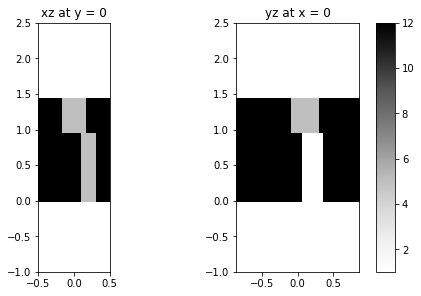

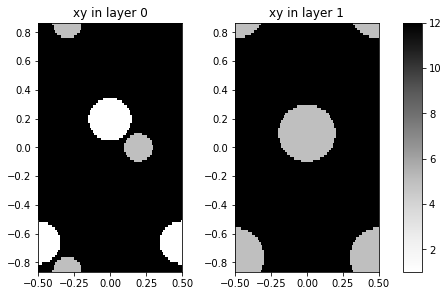

In [90]:
# Initialize a lattice
lattice = Lattice('hexagonal')
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=1, eps_b=12)
# Add shapes to this layer 
phc.add_shape(Circle(y_cent = 0.2, r = 0.15), layer=0)
phc.add_shape(Circle(x_cent = 0.2, r = 0.1, eps = 5), layer=0)
# Add another layer and a shape
phc.add_layer(d=0.5, eps_b=12)
phc.layers[-1].add_shape(Circle(y_cent = 0.1, r = 0.2, eps=5))
# Plot an overview picture
phc.plot_overview()

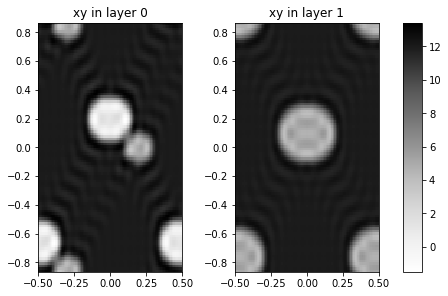

In [91]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

In [95]:
gme.run(N_g_array = 5)

[ 1.         10.8482374  10.98427236  1.        ] [1.  0.5]
[[], [], [], [], []] [[], [], [], [], []]


In [71]:
n = [1, 3]
n = np.array(n)
n1 = n[np.remainder(n, 2) == 0]
print(n1.shape)
if n1:
    print('hey')

(0,)


/home/momchil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
